Author: Vikram H Patil

Date: 4/10/2018

Version: 1.0

Environment: Python 3.6.1 and Jupyter notebook

Libraries used: Main libraries used for assignment:
* re (for regular expression, included in Anaconda Python 3.6) 
* sys (to display system version, included in Anaconda Python 3.6) 
* os (for changing file directory, included in Anaconda Python 3.6) 
* warnings (to ignore any warnings thrown while execution, included in Anaconda Python 3.6) 
* pandas(for creating dataframes, included in Anaconda Python 3.6) 
* matplotlib(for plotting dataframes, included in Anaconda Python 3.6)  
* numpy(for numeric calculations, included in Anaconda Python 3.6) 
* seaborn(for plotting graphs, included in Anaconda Python 3.6) 
* Few pictures are captured from Tableau
* datetime(for verying date time, included in Anaconda Python 3.6) 
* math(to perform calculation, included in Anaconda Python 3.6)

# Contents

### 1- Libraries
### 2- Read the csv file
### 3- Exploring Dataframe:
* 3-1 Printing information of DataFrame
* 3-2 Describing the DataFrame
* 3-3 Displaying the top data
* 3.4 Displaying null values for each feature

### 4 -Dropping duplicates and ID=null

### 5 - Fixing Departure Date
*  5-1 Creating a Regex function to clean the date errors
* 5-2 function to clean the date errors & return clean data format

### 6 - Latitude and Longitude 

### 7 - Post Type

### 8 - Verifying distance
*  8-1 Analysis - Calculate the distance using the formula 
* 8-2 Solution: Drop the Journey Distance Column and rename the calculated distance as the new Journey Distance

### 9- Origin Region
*  9-1 Analysis - Finding Outliers
*  9-2 Finding Outliers and separting them
* 9-3 Applying KNN model


### 10- Destination Region
*  10-1 Analysis - Finding Outliers
*  10-2 Finding Outliers and separting them
* 10-3 Applying KNN model

### 11- Travel Time

* 11-1 finding null values
* 11-2 Validate travel time= Delivery - Departure
* 11-3 Approach to calculate valid travel-time
* 11-4 Calculating speed
* 11-5 Calculating time
* 11-6 Identfying wrong travel time

### 12 - Fixing Drone Type
* 12-1 Drone type-1
* 12-2 Drone type-2
* 12-3 Drone type-3
* 12-4 Fixing null values in Drone type

### 13- Delivery time


### 14- Delivery Price

* 14-1 Divding the Departure time into intervals
* 14-2 EDA on Delivery price - Detection of outliers on Drone type
* 14-3 Clean outliers in Drone type agaisnt Delivery fare
* 14-4 Linear Modelling to predict Delivery Price        
    * 14-4-a Dividing the Delivery Price data into train and test
    * 14-4-b Finding the correlation against all variables
    * 14-4-c Further analysis on Price-Train data  & Model Evaluation
    * 14-4-d Predicting Delivery Price

### 15 - Saving to csv file

### 16 - Conclusion 
### 17- References

---------------

## 1-Libraries

In [177]:
# Importing libraries for assessment 2
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sys
import warnings
warnings.filterwarnings("ignore")

In [178]:
#Printing system version

print (sys.version_info)

sys.version_info(major=3, minor=6, micro=6, releaselevel='final', serial=0)


## 2- Read the csv file 

In [179]:
#reading the file and storing it in a dataframe
file_df=pd.read_csv("29389690.csv")

In [180]:
#Printing total rows and column

file_df.shape

(37057, 16)

## 3- Exploring Dataframe

### 3-1 Printing information of DataFrame

In [181]:
file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37057 entries, 0 to 37056
Data columns (total 16 columns):
Id                       37034 non-null object
Drone Type               37047 non-null float64
Post Type                37037 non-null float64
Package Weight           37057 non-null float64
Origin Region            37047 non-null float64
Destination Region       37047 non-null float64
Origin Latitude          37057 non-null float64
Origin Longitude         37057 non-null float64
Destination Latitude     37057 non-null float64
Destination Longitude    37057 non-null float64
Journey Distance         37057 non-null float64
Departure Date           37057 non-null object
Departure Time           37057 non-null object
Travel Time              37017 non-null float64
Delivery Time            37057 non-null object
Delivery Fare            37027 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.5+ MB


### 3-2 Describing the DataFrame

In [182]:
# describing continuous type
file_df.describe()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
count,37047.000000,37037.000000,37057.000000,37047.000000,37047.000000,37057.000000,37057.000000,37057.000000,37057.000000,37057.000000,37017.000000,37027.000000
mean,1.701811,0.295650,27.772921,24.516101,24.381893,-37.730250,145.477021,-37.735883,145.468772,211.999684,206.569682,158.117897
std,0.782938,0.456341,13.263648,13.861377,13.889921,1.915717,6.977234,1.911067,6.970036,110.955078,105.750568,65.819166
min,1.000000,0.000000,5.002000,1.000000,1.000000,-39.006972,-148.429597,-39.006972,-148.360807,0.171000,6.880000,71.030000
25%,1.000000,0.000000,16.350000,13.000000,12.000000,-38.442348,144.238194,-38.453467,144.248257,127.218000,125.830000,125.740000
50%,1.000000,0.000000,27.683000,25.000000,24.000000,-37.777972,145.689094,-37.791942,145.665539,200.491000,195.200000,151.080000
75%,2.000000,1.000000,39.038000,37.000000,36.000000,-37.116141,146.980050,-37.120764,146.974125,283.804000,274.600000,179.170000
max,3.000000,1.000000,59.984000,48.000000,48.000000,38.937244,148.450513,38.826764,148.450513,556.831000,563.330000,1407.460000


In [183]:
# Describing categorical type

file_df.describe(include=['O'])

,Id,Departure Date,Departure Time,Delivery Time
count,37034,37057,37057,37057
unique,36997,280,30085,30189
top,ID1331605334,18/02/2018,3:31:24,19:45:01
freq,2,224,5,5


### 3-3 Displaying the top 5 data

In [184]:
file_df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1155220853,3.0,0.0,29.246,9.0,8.0,-37.543231,146.694631,-38.688709,147.836706,162.058,7/07/2018,3:32:59,141.78,5:54:45,201.76
1,ID1934229843,3.0,0.0,15.151,23.0,13.0,-38.719744,143.924901,-36.816430,147.486725,378.269,25/02/2018,17:46:42,321.96,23:08:39,202.88
2,ID1516274046,3.0,0.0,24.750,44.0,45.0,-38.181825,144.361734,-38.983453,144.674366,93.289,15/06/2018,13:34:05,84.48,14:58:33,183.65
3,ID1556088517,3.0,0.0,30.177,32.0,43.0,-36.533097,144.367291,-37.965204,147.219601,298.795,23/03/2018,13:43:56,255.73,17:59:39,193.09
4,ID1767368003,1.0,0.0,39.495,40.0,11.0,-37.952008,148.426079,-37.629604,144.048613,386.712,21/07/2018,19:59:06,393.21,2:32:18,132.26


### 3.4 - Displaying null values for each feature

In [185]:

file_df.isnull().sum()

Id                       23
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            30
dtype: int64

--------------------------------------------------------------
# Start of Data cleaning
------------------------------------------------------

Assumption: Based on EDA, Departure Time and package weight is assumed to be valid

# 4 -Dropping duplicates and ID=null

From below analysis, there are total 60 rows where duplicate rows and ID=null are present. 
This information can be seen in dataframe=new_df
Since ID is a unique identifer, we can't impute them and these conditions are noise in the dataframe.

Removing 60 values, the new filtered count is 36997

In [186]:
# Making a copy of main dataframe
test_df=file_df.copy()

In [187]:
# Dropping duplicates
test_df=test_df.drop_duplicates(keep='first')

# Dropping rows where 'Id' is null
test_df = test_df.drop(test_df[test_df.Id.isnull()].index)

# Priniting the new shape
test_df.shape

(36997, 16)

In [188]:
# This dataframe contains all the duplicates and ID null values
new_df=file_df[~file_df.isin(test_df)]
new_df=new_df.dropna(how='all')
new_df=new_df.sort_values('Drone Type')
new_df.shape


(60, 16)

### Since test_df Dataframe is cleaned with redudant data, this dataframe is used going forward
---

## 5 - Cleaning Departure Date

From EDA, Date variable has 3 errors:
* Date format error       
* February month ending with 30    
* Months wrongly ending with day 31

### Approach:
   #### 5-1 Creating a Regex function to clean the date errors

In [189]:
#Below function accepts the improper dates and returns cleaned ones

def cleanup(date):
    PATTERNS = [
        r'(\d{4})-(1[3-9]|2[0-9]|3[0-9])-(\d{1,2})$',
        r'(\d{4})-(02)-(29|3[0-9])$',
        r'(\d{4})-(04|06|09|11)-(31)$']
    
    PATTERNS = [re.compile(p) for p in PATTERNS]
    
    for i, p in enumerate(PATTERNS):
        res = p.match(date)
        if res and i == 0: #swap month and day
             return f'{res[1]}-{res[3]}-{res[2]}'
            
        if res and i == 1:  #Verifying for february and ending the month by 28
             return f'{res[1]}-{res[2]}-28'
        
        if res and i == 2:  #Ending the month to 30 for April,June,September and November
             return f'{res[1]}-{res[2]}-30'


#### 5-2 function to clean the date errors & return clean data format

In [190]:
#Checking date 

import datetime

filtered_file=[]  # to store clean dates

# Below method validates whether date is valid or not, if invalid, exception is caught and passed to funciton(5-1) to clean

def validate(date_text):
    incorrect_date=[]
    try:
        datetime.datetime.strptime(date_text, '%Y-%m-%d')
        filtered_file.append(date_text)
    except ValueError:
        incorrect_date.append(date_text)
        filtered_file.append(cleanup(date_text))

sample_file=test_df['Departure Date']
for each in sample_file:validate(each)
###################################################################################################################

#Creating new dataframe for filtered 'Departure Date' and adding back new filtered departure date to the data frame.

filt_df = pd.DataFrame({'Departure Date':filtered_file})
test_df.update(filt_df)

In [191]:
test_df[test_df['Id']=='ID1657544928']

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
776,ID1657544928,2.0,0.0,29.716,34.0,9.0,-38.486662,146.635211,-37.392972,146.801878,122.622,13/04/2018,20:01:14,119.81,18:01:26,142.77


# 6 - Latitude and Longitude 

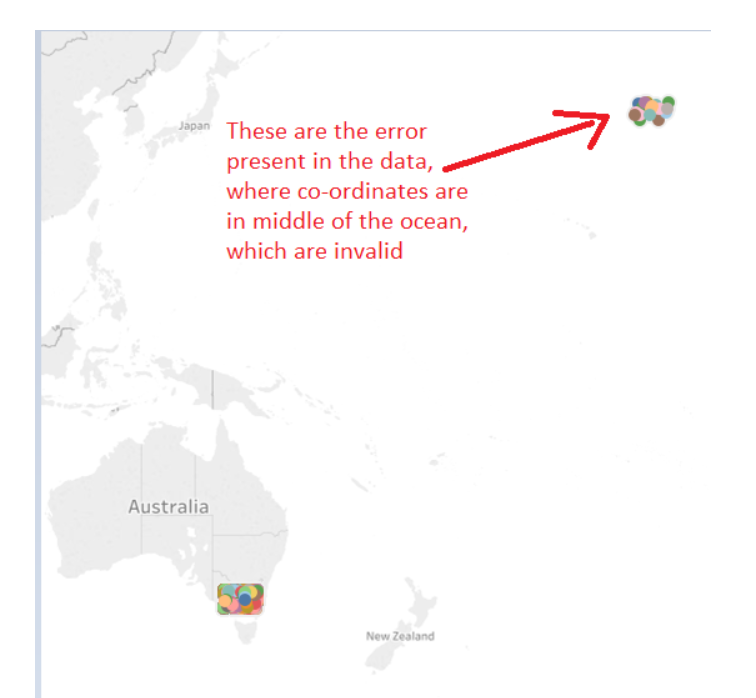


Latitude and Longitude of both Regions(Origin and Destination) are invalid for these data

### Approach:

Negating the values, post this cordinates are fixed

In [192]:
# Both regions' invalid data is subtracted and data is fixed

test_df['Origin Latitude'] = np.where(test_df['Origin Latitude']>0, -1*test_df['Origin Latitude'],test_df['Origin Latitude'])
test_df['Origin Longitude'] = np.where(test_df['Origin Longitude']<0, -1*test_df['Origin Longitude'],test_df['Origin Longitude'])



test_df['Destination Latitude'] = np.where(test_df['Destination Latitude']>0, -1*test_df['Destination Latitude'],test_df['Destination Latitude'])
test_df['Destination Longitude'] = np.where(test_df['Destination Longitude']<0, -1*test_df['Destination Longitude'],test_df['Destination Longitude'])


--------------------------------------
# 7- Filling post type

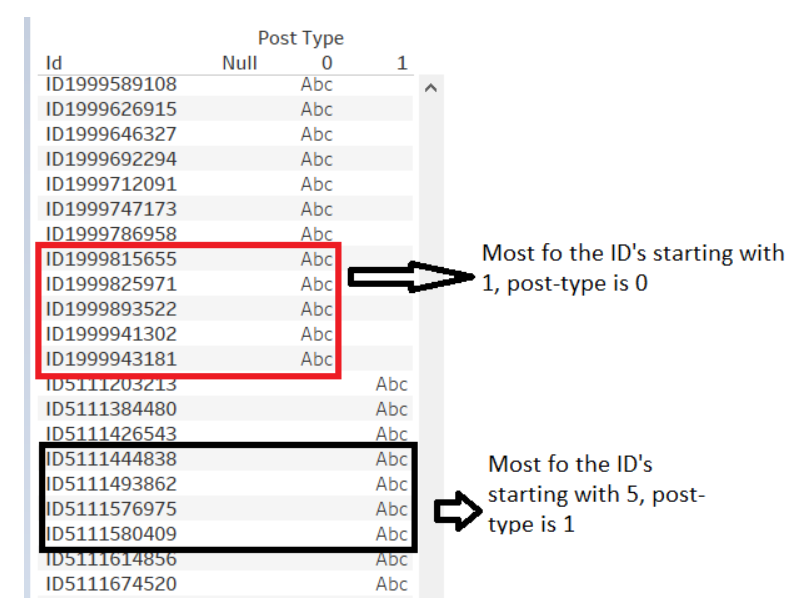

In [193]:
#Before filling post type

print("Total null values present in Post Type=",len(test_df[test_df['Post Type'].isnull()]))


Total null values present in Post Type= 20


#### Based on EDA, there is pattern between ID and Post Type

#### for most cases, ID starting with 5, post type is 1.0  &  ID starting with 1, post type is 0.0

#### Two errors are present.(post type null vales and wrong post type values)
Based on above inference, both issues  are fixed in below step

In [194]:
# below function matches the Post type using regex match and return the correct post-type value

def clean_postype(id_data):
    if re.match("ID5",id_data):
        return 1.0
    else:
        return 0.0
    
test_df['Post Type']=test_df['Id'].apply(lambda x: clean_postype(x) if(str(x) != 'nan') else x)

-------------------------------------------
# 8 - Verifying distance

#### 8-1 Analysis - Calculate the distance using the formula 

In [195]:
from math import sin, cos, sqrt, atan2, radians

#Below function calculated the actual distance using the formula, considering the latitudes & longitudes of origin and destination

def calculate_dist(o_lat,o_lon,d_lat,d_lon):
    R = 6378.0
    lat1 = radians(o_lat)
    lon1 = radians(o_lon)
    lat2 = radians(d_lat)
    lon2 = radians(d_lon)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = round(R * c,3)
    return distance

test_df['cal_dist']=test_df.apply(lambda x: calculate_dist(x['Origin Latitude'],x['Origin Longitude'],x['Destination Latitude'],x['Destination Longitude']),axis=1)


In [196]:
#Verifying how many journey distances are not same compared with calculated distance
filt=round(test_df['Journey Distance'],3) != test_df['cal_dist']

test_df[filt][['Id','Journey Distance','cal_dist']]

,Id,Journey Distance,cal_dist
4297,ID1914453733,350.871,345.071
4321,ID1344783067,167.685,170.585
5157,ID1652809906,282.821,284.921
5804,ID1437571294,387.640,383.940
8394,ID5907496437,47.548,38.348
12322,ID1724446678,124.620,118.920
14030,ID1949877322,244.918,241.618
14545,ID1990830084,110.668,102.768
16578,ID1829116263,238.266,234.266
18650,ID1716695648,380.373,376.873


#### From above we can confirm that 14 Journey Distances are not the same.
-------------
### 8-2 Solution: Drop the Journey Distance Column and rename the calculated distance as the new Journey Distance

In [197]:
#Dropping 'Departure Date' and adding back new filtered departure date to the data frame.
test_df.drop(['Journey Distance'], axis=1, inplace=True)

#Renaming columns name from 'cal_dist' to 'Journey Distance'
test_df.rename(columns={'cal_dist':'Journey Distance'}, inplace=True)


------------------

# 9- Origin Region

### 9-1 Analysis - Finding Outliers

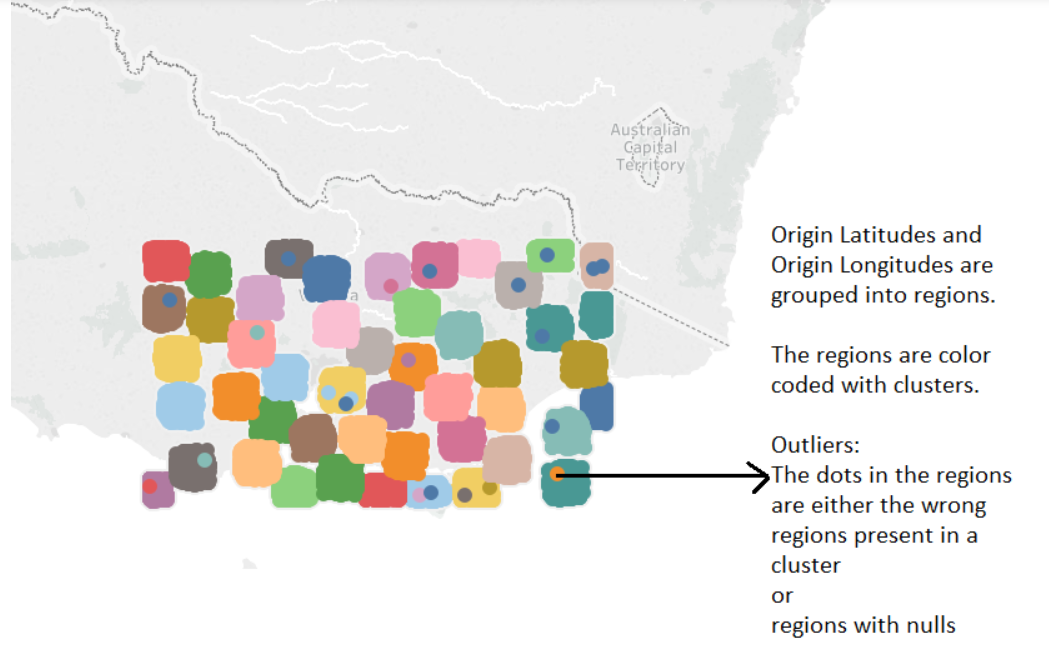


Above analysis confirms the presence of outliers in the origin regions

#### Approach:

1) Find the outliers.                        
2) Separate them into clean and unclean data (which contains outliers and null values).                       
3) I am running KNN algorithm on the clean data set and predicting correct origin regions for the unclean dataset              


##### <font color='red'>NOTE: Above method also holds good to determine destination region<font> 

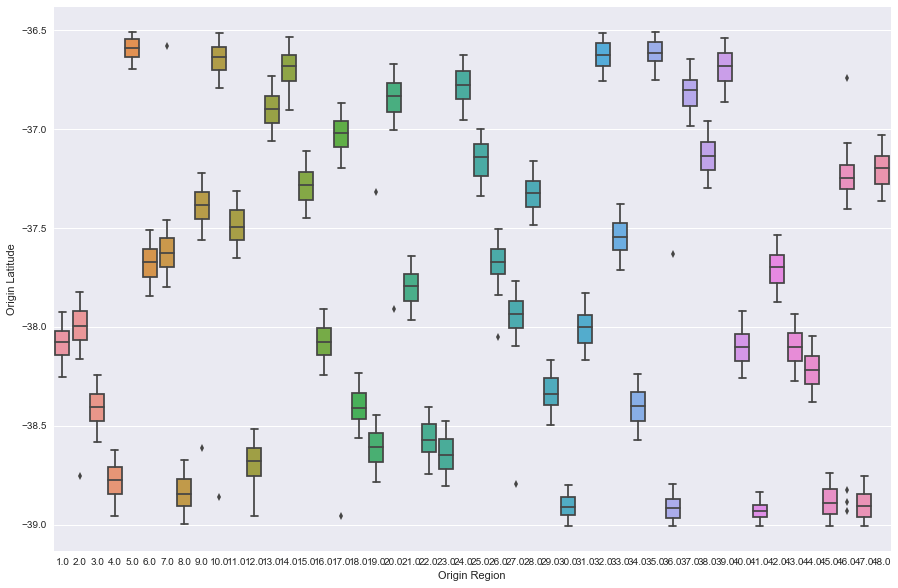

In [198]:
#### Above analysis can be further confirmed by plotting boxplot and finding the outliers


# Below graph confirms the outliers present in the Origin region wrt Origin latitude are many

plt.rcParams['figure.figsize']=15,10
xi=test_df[['Origin Latitude','Origin Longitude','Origin Region']]
sns.boxplot(data=xi,x='Origin Region',y='Origin Latitude')

### 9-2 Finding Outliers and separting them

In [199]:


Regions=list(range(1,49))


df_OriginRegions=test_df[['Origin Latitude','Origin Longitude','Origin Region']]

#### Below method identifies the outliers by verfying the IQR range and filters them into cleaned and outlier data

def clean_outlier(data_df):
    df_clean = pd.DataFrame() 
    df_outlier = pd.DataFrame()     
    for each in Regions:
        df_eachRegion=data_df[data_df.iloc[:,-1]==[each]]
        Q1 = df_eachRegion.quantile(0.25)
        Q3 = df_eachRegion.quantile(0.75)
        IQR = Q3 - Q1
        
        clean=df_eachRegion[~((df_eachRegion < (Q1 - 1.5 * IQR)) |(df_eachRegion > (Q3 + 1.5 * IQR))).any(axis=1)]
        df_clean=pd.concat([df_clean,clean])
                               
        outlier=df_eachRegion[((df_eachRegion < (Q1 - 1.5 * IQR)) |(df_eachRegion > (Q3 + 1.5 * IQR))).any(axis=1)]
        df_outlier=pd.concat([df_outlier,outlier])

    return(df_clean,df_outlier)


##### Below variables contain the cleaned and outlier data
cleaned_Origin_data,outlier_Origin_data=clean_outlier(df_OriginRegions)

### 9-3 Applying KNN model

In [200]:
#### Dividing train and test data of Origin region

# The test data contains 2 categories: Nulls and Outliers of Origin region

#--------- Fidning all nulls of Origin---------------
OR_allnull=test_df[test_df['Origin Region'].isnull()]

#--------- selecting all the outliers of Origin Region from main dataframe -------------
outlier_OR_df = test_df.index.isin(outlier_Origin_data.index)
outlier_OR_df=test_df[outlier_OR_df]

# Mapping of above both to form final Origin Region's testing data
OR_test=pd.concat([OR_allnull,outlier_OR_df])

# A Copy of cleaned data becomes training data
OR_train=cleaned_Origin_data.copy()

In [201]:
#### obtain k-value

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':range(1,6)}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=10)
model.fit(OR_train[['Origin Latitude','Origin Longitude']],OR_train['Origin Region'])
model.best_params_

{'n_neighbors': 5}

In [202]:
#### Fitting the model

from sklearn.neighbors import KNeighborsClassifier

neigh_model = KNeighborsClassifier(n_neighbors=5)
neigh_model.fit(OR_train[['Origin Latitude','Origin Longitude']],OR_train['Origin Region'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [203]:
#### Predicition 


OR_test['Origin Region'] = neigh_model.predict(OR_test[['Origin Latitude','Origin Longitude']])


In [204]:
### Updating the main dataframe with the predicted values


test_df['Origin Region'] = OR_test['Origin Region'].combine_first(test_df['Origin Region'])


##### Above data now contains clean origin regions

------------
# 10 - Destination Region

#### 10-1 Analysis - finding outliers

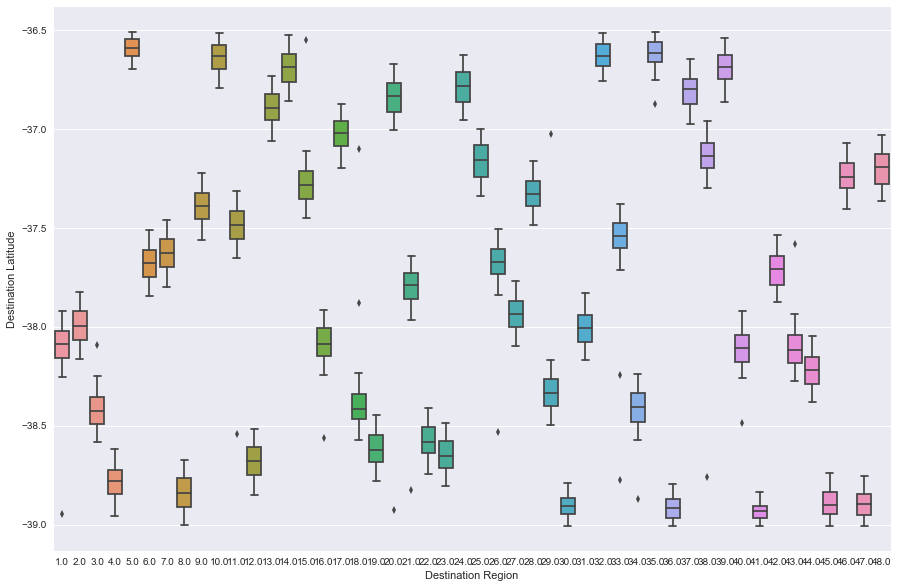

In [205]:
## Below graph confirms the outliers present in the Origin region wrt Origin latitude are many

plt.rcParams['figure.figsize']=15,10
xi=test_df[['Destination Latitude','Destination Longitude','Destination Region']]
sns.boxplot(data=xi,x='Destination Region',y='Destination Latitude')

### 10-2 Finding Outliers and separting them

In [206]:

df_DestRegions=test_df[['Destination Latitude','Destination Longitude','Destination Region']]

cleaned_Dest_data,outlier_Dest_data=clean_outlier(df_DestRegions)

### 10-3 Applying KNN model

In [207]:
#### Dividing train and test data of Origin region

# The test data contains 2 categories: Nulls and Outliers of Destination region

#--------- Finding all nulls of Destination region ---------------
DR_allnull=test_df[test_df['Destination Region'].isnull()]

#--------- selecting all the outliers of Origin Region from main dataframe -------------
outlier_DR_df = test_df.index.isin(outlier_Dest_data.index)
outlier_DR_df=test_df[outlier_DR_df]

# Mapping of above both to form final Origin Region's testing data
DR_test=pd.concat([DR_allnull,outlier_DR_df])

# A Copy of cleaned data becomes training data
DR_train=cleaned_Dest_data.copy()

In [208]:
#### Fitting the model

from sklearn.neighbors import KNeighborsClassifier

neigh_model = KNeighborsClassifier(n_neighbors=5)
neigh_model.fit(DR_train[['Destination Latitude','Destination Longitude']],DR_train['Destination Region'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [209]:
#### Predicition 

DR_test['Destination Region'] = neigh_model.predict(DR_test[['Destination Latitude','Destination Longitude']])

In [210]:
### Updating the main dataframe with the predicted values

test_df['Destination Region'] = DR_test['Destination Region'].combine_first(test_df['Destination Region'])

--------------------

# 11- Travel Time


Below steps confirms there are 3 type of errors in Travel time:
* 40 null values
* 40 incorrect values (delivery time happened earlier to departure time)
* 34 incorrect values (wrong time taken)

### 11-1 finding null values

In [211]:
#Making a new dataframe subset of main one
timedf=test_df[['Id','Drone Type','Departure Time','Delivery Time','Journey Distance','Travel Time']]
timedf.head()

,Id,Drone Type,Departure Time,Delivery Time,Journey Distance,Travel Time
0,ID1155220853,3.0,3:32:59,5:54:45,162.058,141.78
1,ID1934229843,3.0,17:46:42,23:08:39,378.269,321.96
2,ID1516274046,3.0,13:34:05,14:58:33,93.289,84.48
3,ID1556088517,3.0,13:43:56,17:59:39,298.795,255.73
4,ID1767368003,1.0,19:59:06,2:32:18,386.712,393.21


In [212]:
print("There are {} null vales present in 'Travel Time column'".format(len(timedf[timedf['Travel Time'].isnull()])))

There are 40 null vales present in 'Travel Time column'


### 11-2 Validate travel time= Delivery - Departure

Approach:
* find the difference of delivery & departure
* divide the data into valid and invalid
* dividing the valid data based on Drone type-1, 2 & 3

In [213]:
# Creating a new column difference of 'Delivery time' & Departure time. This is required to validate actual 'travel time'

# Defining a method to perform subtraction
def calculate_traveltime(data1,data2):
    t1 = sum(i*j for i, j in zip(map(int, data1.split(':')), [60, 1, 1/60]))
    t2 = sum(i*j for i, j in zip(map(int, data2.split(':')), [60, 1, 1/60]))
    return round((t2-t1),2)
    


timedf['diff_Del&Dep']=timedf.apply(lambda x: calculate_traveltime(x['Departure Time'],x['Delivery Time']),axis=1)

In [214]:
# Divide the 'Travel Time' into two separate columns:
            # 1 - valid data (where travel time is equal to diff_Del&Dep)
            # 2 - invalid data (where travel time is null and travel time is not equal to diff_Del&Dep)

# 1. Finding Valid data:

# 1.a) Defining a method to find valid time data

def find_valid(data1,data2):
    #Adding a tolerance level of 0.01  & 0.02 
    if (data1 == round(data2+0.01,2)) | (data1 == data2) | (data1 == round(data2+0.02,2)):
        return data1

    
timedf['valid_traveltime']=timedf.apply(lambda x:find_valid(x['Travel Time'],x['diff_Del&Dep']),axis=1 )

######################################################################################################
### After above step total null values present in valid data = 5387. Which cannot be a valid scenario
######################################################################################################

#1.b There are few cases where delivery were made before departure time, which cannot be a valid data. 
    # Example: Departure_time= 5pm  & Delivery time = 4pm
    # To find this, I am assumming a valid delivery should be less than 15 hrs

timedf['time_diff']= pd.to_timedelta(timedf['Delivery Time'])-pd.to_timedelta(timedf['Departure Time'])
timedf['time_diff'] = pd.to_timedelta(timedf['time_diff'].dt.seconds, unit='s')
timedf['time'] = timedf['time_diff'] / np.timedelta64(1, 'h')

# below step will find which time is less than 15hrs, this is a valid time
timedf['valid_traveltime']=timedf.apply(lambda x:x['Travel Time'] if x['time']<15 else None,axis=1 )

#################################################################################
##########  Total null values after 1-a and 1-b step is 80 ######################
#################################################################################



# 2. Finding invalid data

valid_traveltime=timedf[timedf['valid_traveltime'].notnull()]
invalid_traveltime=timedf[timedf['valid_traveltime'].isnull()]

In [215]:
#Dropping all unwanted columns

valid_traveltime.drop(['diff_Del&Dep','valid_traveltime','time_diff','time'], axis=1, inplace=True)
invalid_traveltime.drop(['diff_Del&Dep','valid_traveltime','time_diff','time'], axis=1, inplace=True)


#valid_traveltime.drop(['valid_traveltime','time_diff','time'], axis=1, inplace=True)
#invalid_traveltime.drop(['valid_traveltime','time_diff','time'], axis=1, inplace=True)


In [216]:
# Forming 6 dataframe of different Drone type

valid_traveltime_drone1=valid_traveltime[valid_traveltime['Drone Type']==1.0]
invalid_traveltime_drone1=invalid_traveltime[invalid_traveltime['Drone Type']==1.0]


valid_traveltime_drone2=valid_traveltime[valid_traveltime['Drone Type']==2.0]
invalid_traveltime_drone2=invalid_traveltime[invalid_traveltime['Drone Type']==2.0]


valid_traveltime_drone3=valid_traveltime[valid_traveltime['Drone Type']==3.0]
invalid_traveltime_drone3=invalid_traveltime[invalid_traveltime['Drone Type']==3.0]


##### At this step, data is cleaned with outliers, which is required for next steps
----------------
## 11-3 Approach to calculate valid travel-time

### Below method explains how travel time is calculated by solving simultaneous equations

W.K.T               
x ->speed of takeoff   
y -> speed of landing   
z -> speed of onroute    
t -> time taken    
d -> distance travelled   

###### 5x+5y= $\beta$  ------> Treat this as beta. Beta here conveys information on= Distance travelled during takeoff and landing


Then main equation becomes, beta + on route distance = journey distance        
on route distance = time taken (t-10) * speed (z)
##### $\beta$+(t-10)z=d -----------> (main eqn)

---------------------------------------------
##### Selecting random values for Drone type=1 (Refer below picture)

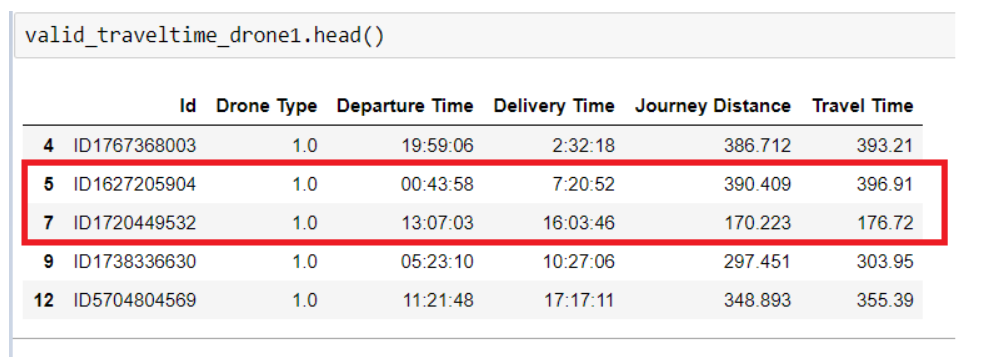

let actual time t=393.21 and travelled distance d=386.712 then main eqn becomes:   
##### * $\beta$+(396.91-10)z=390.409    -----------> (eqn-1)

let t=176.72 and d=390.409 then main eqn becomes:   
##### * $\beta$+(176.72-10)z=170.223    -----------> (eqn-2)


--------------------------------------------
#### Solving eq-1 and eq-2: we get
z(speed of drone type 1) = 60 km/hr         
beta = 210.36

### Using above method, correct 'Travel Time' is calculated


--------------------------------------------------------


### 11-4 Calculating speed 

In [217]:
import numpy as np

# Below is the linear equation which calculates speed and beta

def linear_eqn(time1,time2,dist1,dist2):
    x = np.array([[1/60, (time1-10)/60],[1/60,(time2-10)/60]])
    y = np.array([dist1, dist2])
    beta,z=(np.linalg.solve(x,y))
    return round(beta,2),round(z,2)

beta1,speed1=linear_eqn(396.91,176.72,390.409,170.223)
beta2,speed2=linear_eqn(144.01,122.85,148.845,125.922)
beta3,speed3=linear_eqn(186.23,255.73,215.387,298.795)

print("Speed of Drone type-1={}, beta1={}".format(speed1,beta1))
print("Speed of Drone type-2={}, beta2={}".format(speed2,beta2))
print("Speed of Drone type-3={}, beta3={}".format(speed3,beta3))

Speed of Drone type-1=60.0, beta1=210.36
Speed of Drone type-2=65.0, beta2=220.18
Speed of Drone type-3=72.01, beta3=233.44


### 11-5  Calculating time

In [218]:
# Below function is required to calculate the correct travel time

def calculate_time(dist,beta,speed):
    time_taken=(((dist*60)-(beta))/speed)+10
    return round(time_taken,2)


In [219]:
#Calculating new Travel time

# Approach 
  # calculate all 3 speeds for each droen type and validate the travel time

valid_drone1=pd.concat([valid_traveltime_drone1,invalid_traveltime_drone1])
valid_drone1['timetaken_drone1']=valid_drone1.apply(lambda x: calculate_time(x['Journey Distance'],beta1,speed1),axis=1)
valid_drone1['timetaken_drone2']=valid_drone1.apply(lambda x: calculate_time(x['Journey Distance'],beta2,speed2),axis=1)
valid_drone1['timetaken_drone3']=valid_drone1.apply(lambda x: calculate_time(x['Journey Distance'],beta3,speed3),axis=1)



valid_drone2=pd.concat([valid_traveltime_drone2,invalid_traveltime_drone2])
valid_drone2['timetaken_drone2']=valid_drone2.apply(lambda x: calculate_time(x['Journey Distance'],beta2,speed2),axis=1)
valid_drone2['timetaken_drone1']=valid_drone2.apply(lambda x: calculate_time(x['Journey Distance'],beta1,speed1),axis=1)
valid_drone2['timetaken_drone3']=valid_drone2.apply(lambda x: calculate_time(x['Journey Distance'],beta3,speed3),axis=1)



valid_drone3=pd.concat([valid_traveltime_drone3,invalid_traveltime_drone3])
valid_drone3['timetaken_drone3']=valid_drone3.apply(lambda x: calculate_time(x['Journey Distance'],beta3,speed3),axis=1)
valid_drone3['timetaken_drone2']=valid_drone3.apply(lambda x: calculate_time(x['Journey Distance'],beta2,speed2),axis=1)
valid_drone3['timetaken_drone1']=valid_drone3.apply(lambda x: calculate_time(x['Journey Distance'],beta1,speed1),axis=1)



## 11-6 Identifying wrong Travel time  

#### Here, In drone type 1, there are <font color='red'>26</font> outliers, where mismatch is present.

##### Expected result : given travel time of drone type 1 should be equal to calculated timetaken_drone1
##### Actual result : given travel time of drone type 1 is not equal to calculated timetaken_drone1, instead equal to timetaken_drone2 for below highlighted scenario

#### Solution:   
* The time taken by drone 2 is the new travel time    
* Drone type will be 2, since drone-type 2 was approximate to given travel time

# ---------------------------------------------------------------------------------------------------------------
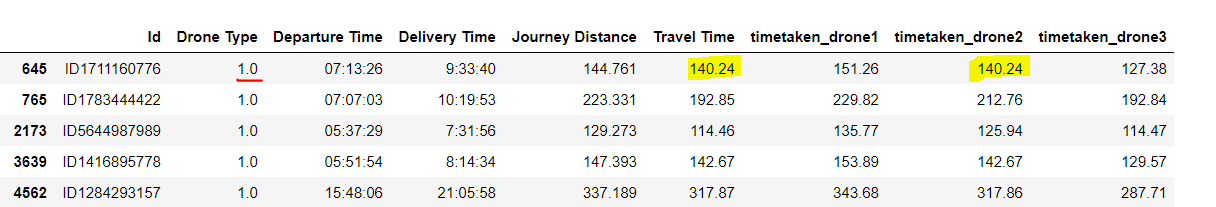
# ---------------------------------------------------------------------------------------------------------------

In [220]:
print("Outliers present in Drone type 1=",len(valid_drone1[valid_drone1['Travel Time'] < valid_drone1['timetaken_drone1']]))

Outliers present in Drone type 1= 26


---------------------------------------------------
# 12 - Fixing invalid Drone-type

### 12 -1 : Drone type=1

In [221]:
sample_df=valid_drone1[valid_drone1['Travel Time'] < valid_drone1['timetaken_drone1']]


In [222]:
# Below method cleans the invalid drone type

def correct_dronetype(traveltime,timetaken_drone1,timetaken_drone2,timetaken_drone3):
    if (traveltime == timetaken_drone1) | (traveltime == round((timetaken_drone1+0.01),2))|(traveltime == round((timetaken_drone1-0.01),2)):
        return 1.0
    elif (traveltime == timetaken_drone2) | (traveltime == round((timetaken_drone2+0.01),2))|(traveltime == round((timetaken_drone2-0.01),2)):
        return 2.0
    else:
        return 3.0

In [223]:
sample_df['new']=sample_df.apply(lambda x: correct_dronetype(x['Travel Time'],x['timetaken_drone1'],x['timetaken_drone2'],x['timetaken_drone3']),axis=1)
sample_df.drop(['Drone Type','timetaken_drone1'], axis=1, inplace=True)
sample_df.rename(columns={'Travel Time':'timetaken_drone1','new':'Drone Type'}, inplace=True)

In [224]:
valid_drone1.update(sample_df)
valid_drone1.drop(['Travel Time','timetaken_drone2','timetaken_drone3'], axis=1, inplace=True)
valid_drone1.rename(columns={'timetaken_drone1':'Travel Time'}, inplace=True)

### 12 -2 : Drone type=2

In [225]:
print("Outliers present in Drone type 2=",len(valid_drone2[valid_drone2['Travel Time'] < valid_drone2['timetaken_drone2']]))

Outliers present in Drone type 2= 8


In [226]:
sample_df2=valid_drone2[valid_drone2['Travel Time'] < valid_drone2['timetaken_drone2']]

sample_df2['new']=sample_df2.apply(lambda x: correct_dronetype(x['Travel Time'],x['timetaken_drone1'],x['timetaken_drone2'],x['timetaken_drone3']),axis=1)
sample_df2.drop(['Drone Type','timetaken_drone1'], axis=1, inplace=True)
sample_df2.rename(columns={'Travel Time':'timetaken_drone1','new':'Drone Type'}, inplace=True)

In [227]:
valid_drone2.update(sample_df)
valid_drone2.drop(['Travel Time','timetaken_drone1','timetaken_drone3'], axis=1, inplace=True)
valid_drone2.rename(columns={'timetaken_drone2':'Travel Time'}, inplace=True)

### 12 -3 : Drone type=3
#### There are no errors in Drone type 3, hence going ahead with concatinating all 3 dfs

------------------------------------------------

In [228]:
valid_drone3.drop(['Travel Time','timetaken_drone1','timetaken_drone2'], axis=1, inplace=True)
valid_drone3.rename(columns={'timetaken_drone3':'Travel Time'}, inplace=True)

In [229]:
# mapping all 3 dfs
test1_df=pd.concat([valid_drone1,valid_drone2,valid_drone3])


In [230]:
# Updating the main df
test_df.update(test1_df)


### 12-4 Fixing null values in Drone type

Below step confirms total 10 nulls are present for Drone Type

Approach:

* Find the 3 travel time, for respective drone type    
* Identify which given travel time is equal to calculated drone time
* fill the Drone type



In [231]:
print("Total null values in Drone Type",len(test_df[test_df['Drone Type'].isnull()]))

Total null values in Drone Type 10


In [232]:
# Finding the 3 travel time, for respective droen type


sample_nulldrone_df=test_df[test_df['Drone Type'].isnull()]


sample_nulldrone_df['timetaken_drone1']=test_df.apply(lambda x: calculate_time(x['Journey Distance'],beta1,speed1),axis=1)
sample_nulldrone_df['timetaken_drone2']=test_df.apply(lambda x: calculate_time(x['Journey Distance'],beta2,speed2),axis=1)
sample_nulldrone_df['timetaken_drone3']=test_df.apply(lambda x: calculate_time(x['Journey Distance'],beta3,speed3),axis=1)


# Filling the correct drone type, by using the function mentioned in 12-1
sample_nulldrone_df['new']=sample_nulldrone_df.apply(lambda x: correct_dronetype(x['Travel Time'],x['timetaken_drone1'],x['timetaken_drone2'],x['timetaken_drone3']),axis=1)
sample_nulldrone_df.drop(['Drone Type','timetaken_drone1','timetaken_drone2','timetaken_drone3'], axis=1, inplace=True)
sample_nulldrone_df.rename(columns={'new':'Drone Type'}, inplace=True)

In [233]:
test_df.update(sample_nulldrone_df)

----------------------------
# 13- Delivery time


### Formula 'Delivery time' = Departure time + Time taken

In [234]:
# Below steps calculates the correct Delivery time, based on Departure time and Travel time
import time

# below required to convert inton date format
test_df['new_deptime'] = pd.to_timedelta(test_df['Departure Time']) / np.timedelta64(1, 'm')

#below calculates the delivery time
test_df['new_deltime'] = test_df['new_deptime']+test_df['Travel Time']
test_df['new_deltime'] = test_df['new_deltime']*60
test_df['calculated_deliverytime']=test_df['new_deltime'].apply(lambda x: time.strftime("%H:%M:%S",time.gmtime(x)))

# Dropping unwanted columns and saving the final dataframe
test_df.drop(['new_deptime','new_deltime','Delivery Time'], axis=1, inplace=True)
test_df.rename(columns={'calculated_deliverytime':'Delivery Time'}, inplace=True)

---------------------------

# 14- Delivery Price

Approach : Delivery Price can be predicted based on linear modelling. Before that, final data is analyzed for outliers and post cleaning, price is predicted

-----
## 14-1 Divding the Departure time into intervals

This step is required to analyze its affects on linear model prediction

In [235]:
# Below method is used to divide the Departure time into intervals of 1-morning  2-afternoon 3-night.

# Range is morning (6:00:00 - 11:59:59), afternoon(12:00:00 - 20:59:59), and night (21:00 - 5:59:59)

def interval(data):
    data= data.split(':')
    hour=int(data[0])
    time_interval = [1,2,3] # 1-morning  2-afternoon 3-night
    if 6 <= hour < 12:
        return time_interval[0]
    elif 12 <= hour < 21:
        return time_interval[1]
    else:
        return time_interval[2]
    
test_df['interval']=test_df.apply(lambda x: interval(x['Departure Time']),axis=1)

--------

## 14-2 EDA on Delivery price

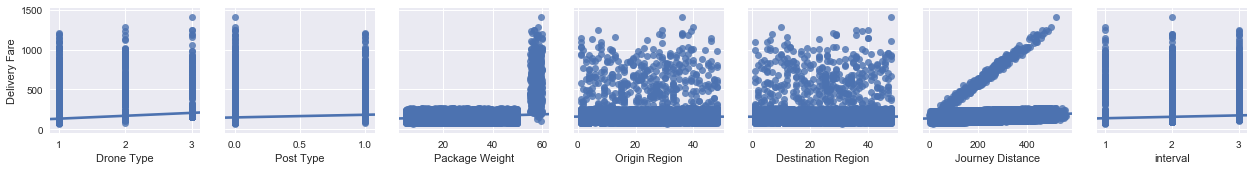

In [236]:
# Below graph plots all features against Delivery fare


sns.pairplot(test_df,x_vars=['Drone Type','Post Type','Package Weight','Origin Region','Destination Region','Journey Distance','interval'],y_vars='Delivery Fare',kind='reg')


##### Drone type seem to have outliers and needs treatment

##### Detection of outliers on Drone type

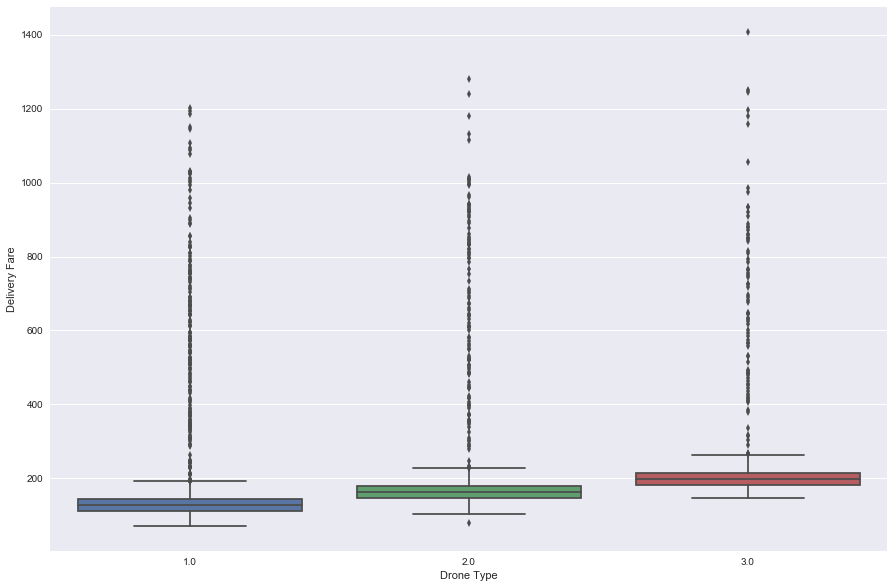

In [237]:
# Below plots the box plot Drone type against Delivery fare

plt.rcParams['figure.figsize']=15,10
xi=test_df[['Delivery Fare','Drone Type']]
sns.boxplot(data=xi,x='Drone Type',y='Delivery Fare')

####  Analyis: Above confirms, there are outliers drone type versus delivery fare and hence needs removal of these outliers in order to proceed with the delivery fare prediction

-------------

### 14-3 Clean outliers in Drone type agaisnt Delivery fare

In [238]:
### This step calculated the outliers and clean them

drone=list(range(1,4))


df_drone_deliveryfare=test_df[['Delivery Fare','Drone Type']]

#### Below method identifies the outliers by verfying the IQR range and filters them into cleaned and outlier data

def clean_outlier(data_df):
    df_clean = pd.DataFrame() 
    df_outlier = pd.DataFrame()     
    for each in drone:
        drone_df=data_df[data_df.iloc[:,-1]==[each]]
        Q1 = drone_df.quantile(0.25)
        Q3 = drone_df.quantile(0.75)
        IQR = Q3 - Q1
        
        clean=drone_df[~((drone_df < (Q1 - 1.5 * IQR)) |(drone_df > (Q3 + 1.5 * IQR))).any(axis=1)]
        df_clean=pd.concat([df_clean,clean])
                               
        outlier=drone_df[((drone_df < (Q1 - 1.5 * IQR)) |(drone_df > (Q3 + 1.5 * IQR))).any(axis=1)]
        df_outlier=pd.concat([df_outlier,outlier])

    return(df_clean,df_outlier)


##### Below variables contain the cleaned and outlier data
cleaned_data,outlier_data=clean_outlier(df_drone_deliveryfare)

In [239]:
# This step is required to map the cleaned data with the main data. Result is clean dataframe is extracted

clean_df = test_df.index.isin(cleaned_data.index)
clean_df=test_df[clean_df]

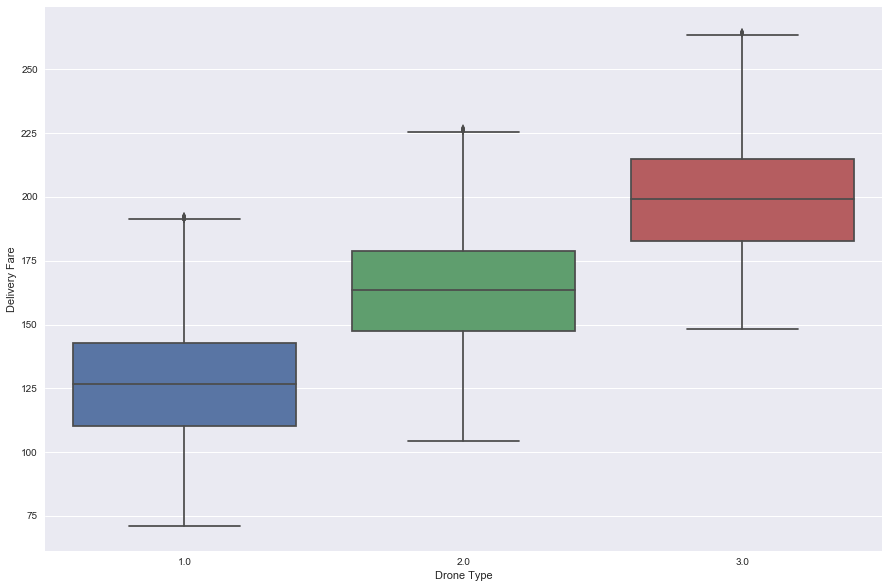

In [240]:
# Plotting and verfying for outlier removal

plt.rcParams['figure.figsize']=15,10
xi=clean_df[['Delivery Fare','Drone Type']]
sns.boxplot(data=xi,x='Drone Type',y='Delivery Fare')

In [241]:
print(" {} rows were present before outlier removal, and {} rows present after outlier removal".format (len(test_df),len(clean_df)))

 36997 rows were present before outlier removal, and 36589 rows present after outlier removal


-------
### 14-4 Linear Modelling to predict Delivery Price


#### 14-4-a Dividing the Delivery Price data into train and test

In [242]:
#Taking all numerical features 

lr_df=clean_df[['Drone Type','Post Type','Package Weight','Journey Distance','interval','Delivery Fare']]
lr_df.head()

,Drone Type,Post Type,Package Weight,Journey Distance,interval,Delivery Fare
0,3.0,0.0,29.246,162.058,3,201.76
1,3.0,0.0,15.151,378.269,2,202.88
2,3.0,0.0,24.750,93.289,2,183.65
3,3.0,0.0,30.177,298.795,2,193.09
4,1.0,0.0,39.495,386.712,2,132.26


In [243]:
# Dividing the Delivery price data into train and test
   #### Train contains all the not null values of delivery price
   #### Test contains all the null values of delivery price

train_fare_df=lr_df[lr_df['Delivery Fare'].notnull()]
test_fare_df=lr_df[lr_df['Delivery Fare'].isnull()]

#### 14-4-b Finding correlation

In [244]:
# Plotting the correlation and analysis step

corr = train_fare_df.corr()
corr.style.background_gradient()


,Drone Type,Post Type,Package Weight,Journey Distance,interval,Delivery Fare
Drone Type,1,0.0018663,-0.00444609,0.00243664,-0.00686566,0.774963
Post Type,0.0018663,1,-0.0145613,-0.00210356,-0.00466742,0.418818
Package Weight,-0.00444609,-0.0145613,1,-0.00789526,0.00227662,0.0193608
Journey Distance,0.00243664,-0.00210356,-0.00789526,1,0.00239813,0.243234
interval,-0.00686566,-0.00466742,0.00227662,0.00239813,1,0.38917
Delivery Fare,0.774963,0.418818,0.0193608,0.243234,0.38917,1


#### Analysis:
1) Drone Type & Delivery Fare are highly correlated         
2) Post Type,interval & Delivery Fare are correlated at medium level       
3) Package weight,Journey Distance & Delivery Fare ar correlated at low level           
4) Origin Region, Destination Region very less correlation, <font color='red'>hence can be removed for modelling <font>   


#### 14-4-c Further analysis on Price-Train data & Model Evaluation

In [245]:
#Splitting the data on price training data.
  ## This step is required to evaluate model

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_fare_df.iloc[:,:-1],train_fare_df.iloc[:,-1:], random_state = 111)

In [246]:
from sklearn.linear_model import LinearRegression

# Linear model is applied on X_train and y_train

lm_full = LinearRegression() # object of Linear Regression

lm_full.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [247]:
# Predicting the price based on X_test

y_pred=lm_full.predict(X_test) 

In [248]:
# Model Evaluation

# Finding R-Square

print ('R-squared for this model = ',lm_full.score(X_test,y_test))

# Finding RMSE

print('\nRMSE of the model=',np.sqrt(mean_squared_error(y_pred,y_test)))

R-squared for this model =  0.9915422858083026

RMSE of the model= 3.3477328732240794


Text(0.5,1,'Linear Fit Graph')

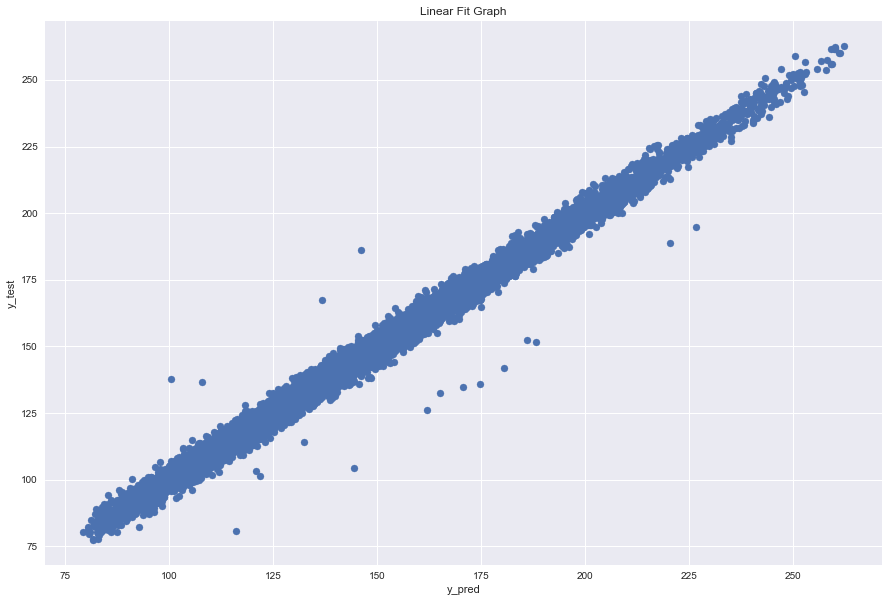

In [249]:
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Linear Fit Graph')

##### The relation between given and predicted fare is linear in relation           &            R-squared = 0.99 and RMSE = 3.347. Based on above inference, I am concluding that model is good for predicting

------------


#### 14-4-d Predicting Delivery Price

The final model is run on predicting the unknown values of Delivery Price

In [250]:
# All the null values in test_fare_df is predicted

test_fare_df['Delivery Fare'][test_fare_df['Delivery Fare'].isnull()] = lm_full.predict(test_fare_df.drop(['Delivery Fare'],axis=1)) 


test_fare_df['Delivery Fare']=round(test_fare_df['Delivery Fare'],2)

In [251]:
# Updating the main dataframe

test_df['Delivery Fare'][test_df['Delivery Fare'].isnull()] = test_fare_df['Delivery Fare']

test_df.drop(['interval'], axis=1, inplace=True) # dropping the interval column


In [252]:
#Verifying for any duplicate values.

test_df[test_df.duplicated]


#This confirms no duplicates values are present.

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Departure Date,Departure Time,Travel Time,Delivery Fare,Journey Distance,Delivery Time


----------

# 15 - Saving to csv file

In [98]:
# saving to csv file

test_df.to_csv('29389690_solution.csv', encoding='utf-8', index=False)



In [253]:
test_df[test_df['Id']=='ID1625703837']

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Departure Date,Departure Time,Travel Time,Delivery Fare,Journey Distance,Delivery Time
70,ID1625703837,3.0,0.0,12.292,26.0,33.0,-37.711307,147.16704,-37.707562,145.448786,9/02/2018,19:01:18,132.84,183.58,151.317,21:14:08


# 16 - Conclusion:

* 36987 rows are the final cleaned data out of total 37057 rows.
* Origin_Latitude: Total number of errors fixed: 20,    
* Destination_Latitude: Total number of errors fixed: 20,   
* Destination_Longitude: Total number of errors fixed 20,     
* Post_Type: Total number of errors fixed: 20,    
* Distance: Total number of errors: fixed: 14,    
* Both Origin and Destination regions are fixed, based on KNN model
    * Origin_Region: Total number of errors fixed: 30,         
    * Destination_Region: Total number of errors fixed: 30,    
* Departure_Date: Total number of errors fixed: 220, 
* Drone_Type: Total number of errors fixed: 36, 
* Travel_Time: Total number of errors fixed: 40,    
* Fare: Total number of errors fixed: 30
* Duplicated rows and Id=nulls are dropped
    * Null_Id: Total number of errors fixed: 23
* Departure_Time: Total number of errors fixed: 40,
* Finally, Delivery Fare is calculated based on Linear model


# 17-  References
* 5 -  https://codereview.stackexchange.com/questions/200176/cleaning-up-date-strings-in-python
* 5-2 - https://stackoverflow.com/questions/16870663/how-do-i-validate-a-date-string-format-in-python
* 8 - https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
* 9-2,10-2  - https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
* 9-3  - https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

